In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df_train = pd.read_csv('../input/digit-recognizer/train.csv')
df_test = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df_train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [6]:
x = df_train.drop(columns=['label'])
y = df_train.label

# K Nearest Neighbors

In [7]:
methods = []
accuracy = []

In [8]:
# from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#               'p': [1,2]}

KNN = KNeighborsClassifier()

In [10]:
# knn_cv = GridSearchCV(KNN, parameters, cv=10)
# knn_cv.fit(x, y)
KNN.fit(x, y)

KNeighborsClassifier()

In [11]:
# print("tuned hpyerparameters:(best parameters) ", knn_cv.best_params_)
# print("accuracy: ", knn_cv.best_score_)

In [12]:
methods.append('K nearest neighbors')
# accuracy.append(knn_cv.score(x, y))
accuracy.append(KNN.score(x, y))

# knn_cv.score(x, y)
KNN.score(x, y)

0.9791428571428571

In [13]:
# yhat = knn_cv.predict(x)
yhat = KNN.predict(x)

# SVM

In [14]:
from sklearn.svm import SVC

In [15]:
# parameters = {'kernel':('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
#               'C': np.logspace(-3, 3, 5),
#               'gamma':np.logspace(-3, 3, 5)}

svm = SVC()

In [16]:
# svm_cv = GridSearchCV(svm, parameters, cv=10)
# svm_cv.fit(x, y)
svm.fit(x, y)

SVC()

In [17]:
# print("tuned hpyerparameters:(best parameters) ", svm_cv.best_params_)
# print("accuracy: ", svm_cv.best_score_)

In [18]:
methods.append('Support vector machine')
# accuracy.append(svm_cv.score(x, y))
accuracy.append(svm.score(x, y))

# svm_cv.score(x, y)
svm.score(x, y)

0.9891428571428571

In [19]:
# yhat = svm_cv.predict(x)
yhat = svm.predict(x)

In [20]:
import matplotlib.pyplot as plt

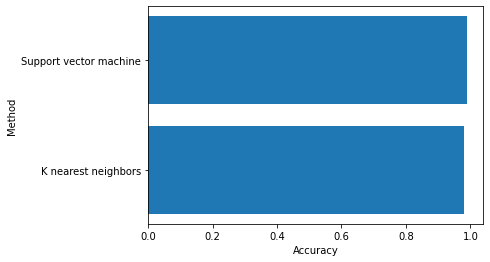

In [21]:
plt.barh(methods, accuracy)

plt.xlabel('Accuracy')
plt.ylabel('Method')
plt.show()

In [22]:
labels = svm.predict(df_test)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = df_train.drop(columns=['label'], axis=1)
y = df_train.label

test = df_test

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

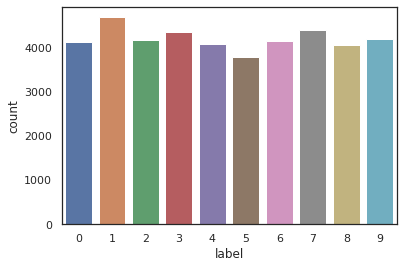

In [26]:
sns.countplot(y)

In [27]:
x = x / 255.0
test = test / 255.0

In [28]:
x = x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [29]:
y = to_categorical(y, num_classes = 10)

In [30]:
random_seed = 2

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=random_seed)

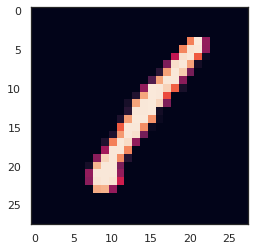

In [32]:
plt.imshow(x[0][:,:,0])

In [33]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2022-10-08 12:33:45.826269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 12:33:45.929839: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 12:33:45.930585: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 12:33:45.932621: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [34]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [35]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [36]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [37]:
epochs = 1
batch_size = 86

In [38]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [39]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(x_val,y_val),
                              verbose=2, steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

2022-10-08 12:33:49.542229: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-08 12:33:51.268413: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


439/439 - 18s - loss: 0.4183 - accuracy: 0.8651 - val_loss: 0.0566 - val_accuracy: 0.9819


In [40]:
results = model.predict(test)

results = np.argmax(results, axis=1)

results = pd.Series(results, name="Label")

In [41]:
submission = pd.concat([pd.Series(range(1, 28001), name='ImageId'), results], axis=1)

submission.to_csv("cnn_mnist_datagen.csv", index=False)